### 직선 검출

1. Canny Edge 검출  
    엣지는 이미지에서 밝기가 급격하게 변하는 부분으로 간주되며 
    cv2.Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None) -> edges  
    - image: 입력 영상  
    - threshold1: 하단 임계값(이 임계값보다 강한 엣지 픽셀만 엣지 픽셀 후보로 남겨짐)  
    - threshold2: 상단 임계값  
    - threshold1:threshold2 = 1:2 또는 1:3  
    - edges: 에지 영상  
    - apertureSize: 소벨 연산을 위한 커널 크기. 기본값은 3.  
    - L2gradient: True이면 L2 norm 사용, False이면 L1 norm 사용. 기본값은 False  

In [1]:
import sys
import numpy as np
import cv2

src = cv2.imread('./img_data/building2.jpeg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
img = cv2.resize(src,(500,500))

# Canny 결과 저장
dst = cv2.Canny(img, 50, 150)

cv2.imshow('original', img)
cv2.imshow('detection', dst)
cv2.waitKey()
cv2.destroyAllWindows()


>결과  
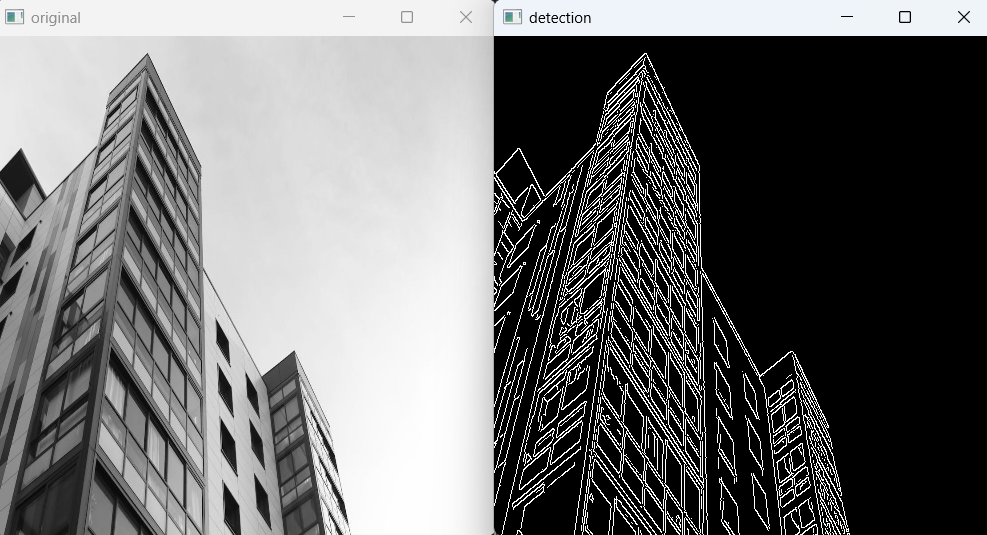

2. 허프 직선 검출  
cv2.HoughLinesP(image, rho, theta, threshold, lines=None, minLineLength=None, maxLineGap=None) -> lines  
    - image: 입력 에지 영상  
    - rho: 축적 배열에서 rho 값의 간격 (e.g.) 1.0 → 1픽셀 간격  
    - theta: 축적 배열에서 theta 값의 간격. (e.g.) np.pi/180 → 1° 간격  
    - threshold: 축적 배열에서 직선으로 판단할 임계값  
    - lines: 직선 파라미터 (rho, theta) 정보를 담고 있는 numpy.ndarray  
    - minLineLength: 검출할 선분의 최소 길이  
    - maxLineGap: 직선으로 간주할 최대 에지 점 간격 


In [9]:
import sys
import numpy as np
import cv2

src = cv2.imread('./img_data/building2.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(src,(500,500))

if src is None:
    print('Image load failed!')
    sys.exit()

# Canny 결과를 허프직선검출 함수로 넘겨 검출을 진행 
edges = cv2.Canny(img, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180., 100, minLineLength=30, maxLineGap=3)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# 검출된 값 시작점과 끝점을 받아 직선을 그림
if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)

cv2.imshow('original', img)
cv2.imshow('detection', dst)
cv2.waitKey()
cv2.destroyAllWindows()

>결과  
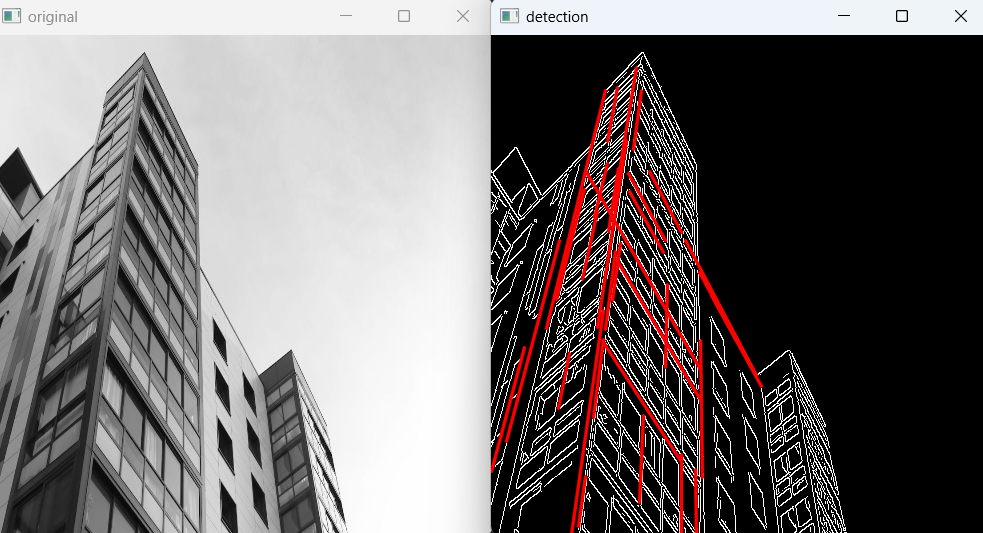

### 도형 검출

1. 허프 원 검출  
cv2.HoughCircles(image, method, dp, minDist, circles=None, param1=None, param2=None, minRadius=None, maxRadius=None) → circles  
    - image: 입력 영상 (에지 영상이 아닌 일반 영상)  
    - method: OpenCV 4.2 이하에서는 cv2.HOUGH_GRADIENT만 지정 가능  
    - dp: 입력 영상과 축적 배열의 크기 비율.
        -  1이면 동일 크기  
        - 2이면 축적 배열의 가로, 세로 크기가 입력 영상의 반  
    - minDist: 검출된 원 중심점들의 최소 거리  
    - circles:(cs, cy, r) 정보를 담은 numpy.ndarray  
    - param1: 케니 에지 검출기의 높은 임계값  
    - param2: 축적 배열에서 원 검출을 위한 임계값  
    - minRadius, maxRadius: 검출할 원의 최소, 최대 반지름  

In [10]:
import sys
import numpy as np
import cv2

src = cv2.imread('./img_data/dial.png')

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0,0), 1.0)

# 읽어온 이미지의 원 최소거리(50), 최소반지름(10), 최대반지름(150)을 주어 검출 진행
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50, param1=120, param2=50, minRadius=3, maxRadius=120)
dst = src.copy()

# 검출된 원이 있다면 각 원의 중심좌표와 반지름을 받아와 원을 그림
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        cv2.circle(dst, (int(cx), int(cy)), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('original', src)
cv2.imshow('detected', dst)
cv2.waitKey()
cv2.destroyAllWindows()


>결과  
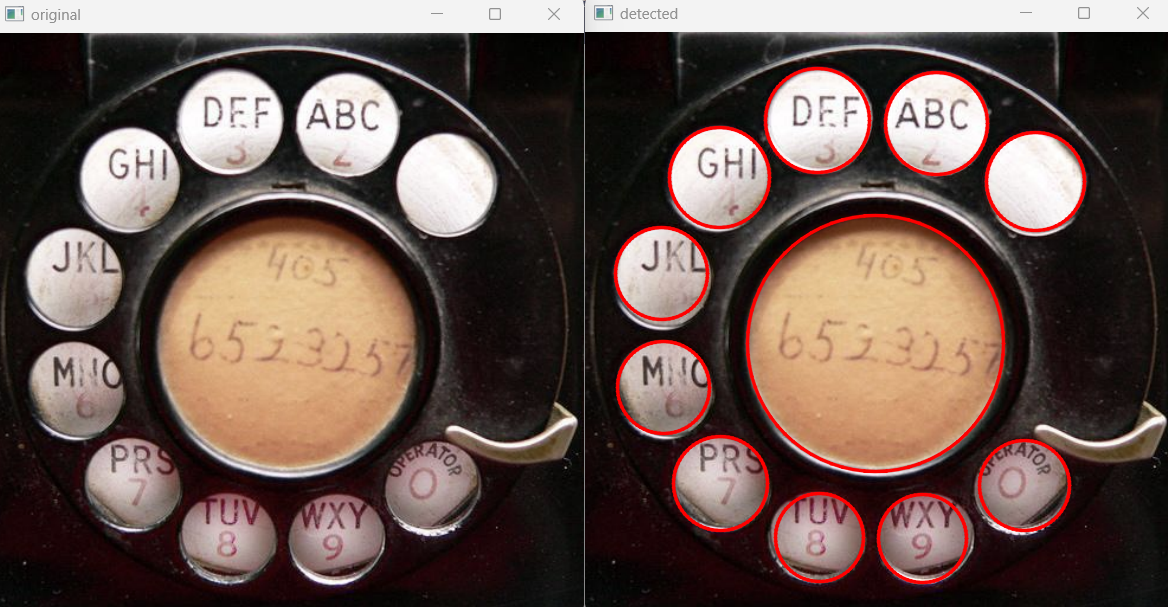

2. 외곽선 검출  
cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None) → contours,
hierarchy  
    - image: 입력 영상. non-zero 픽셀을 객체로 간주함  
    - mode: 외곽선 검출 모드. cv2.RETR_로 시작하는 상수  
    - method: 외곽선 근사화 방법. cv2.CHAIN_APPROX_로 시작하는 상수
    - contours: 검출된 외곽선 좌표  
    - circles:(cs, cy, r) 정보를 담은 numpy.ndarray  
    - hierarchy: 외곽선 계층 정보  
    - offset: 좌표 값 이동 옵셋. 기본값은 (0, 0)    

3. 외곽선 그리기  
cv2.drawContours(image, contours, contourIdx, color, thickness=None, lineType=None, hierarchy=None, maxLevel=None, offset=None) → image  
    - image: 입출력 영상  
    - contours: (cv2.findContours() 함수로 구한) 외곽선 좌표 정보  
    - contourIdx: 외곽선 인덱스. 음수(-1)을 지정하면 모든 외곽선을 그린다.  
    - color: 외곽선 색상  
    - thickness: 외곽선 두께. thickness < 0 이면 내부를 채운다.  
    - lineType: LINE_4, LINE_8, LINE_AA 중 하나 지정  
    - hierarchy: 외곽선 계층 정보  
    - maxLevel: 그리기를 수행할 최대 외곽선 레벨. maxLevel = 0 이면 contourIdx로 지정된 외곽선만 그린다      

In [21]:
import cv2
import sys
img = cv2.imread('./img_data/polygon.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    print('Image load failed!')
    sys.exit()

# 이미지의 이진화 : 이미지를 흑백으로 만들고 경계를 분리하는 프로세스로
# 이미지의 임계처리를 함
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

# 임계처리된 이미지를 전달받아 외곽선 검출
contours, _ = cv2.findContours(img_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 

dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 검출된 결과를 이용하여 외곽선 그리기
for i in range(len(contours)):
     cv2.drawContours(dst, contours, i, (0, 0, 255), 1, cv2.LINE_AA) 

cv2.imshow('gray_img', img)
cv2.imshow('img_bin', img_bin)
cv2.imshow('contours', dst)
cv2.waitKey()
cv2.destroyAllWindows()

>결과  
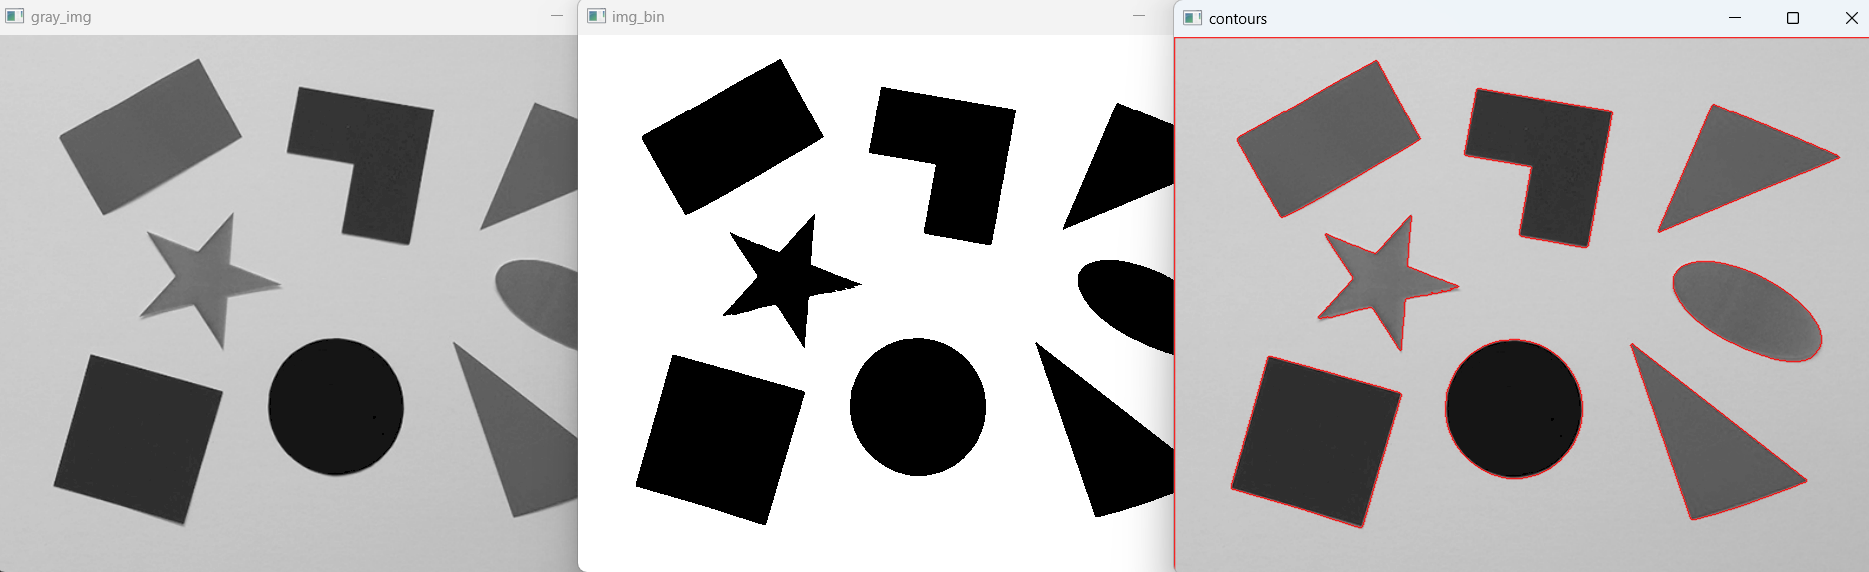

4. 도형 검출 예제  

In [30]:
import math
import cv2

# 전달받은 각 도형의 정보를 활용하여 바운딩박스를 그리고,
# 왼쪽상단에 라벨을 그리는 setLabel 함수 정의
def setLabel(img, pts, label):
    # 바운딩박스 그리기
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

def main():
    src = cv2.imread('./img_data/polygon.png', cv2.IMREAD_COLOR)
    dst = src.copy()
    if src is None:
        print('Image load failed!')
        return

    # 외곽선 검출
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # 검출된 도형의 면적을 구해 크기가 너무 작으면 무시
    for pts in contours:
        if cv2.contourArea(pts) < 400: # 크기가 너무 작으면 무시
            continue
        
        # approxPolyDP()함수를 사용해 검출된 외곽선을 근사화 함
        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)
        vtc = len(approx)
        
        # 외곽선의 점개수에 따라 도형 판별 후 setLabel함수로 라벨링
        if vtc == 3:        # 삼각형
            setLabel(dst, pts, 'TRI')
        elif vtc == 4:      # 사각형
            setLabel(dst, pts, 'RECT')
            # 윤곽선의 길이와 면적의 비율이 1에 가깝다면 원으로 판별
        else:               
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            ratio = 4. * math.pi * area / (length * length)        
            if ratio > 0.85:
                setLabel(dst, pts, 'CIR')

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()

if __name__ == '__main__':
     main()

>결과  
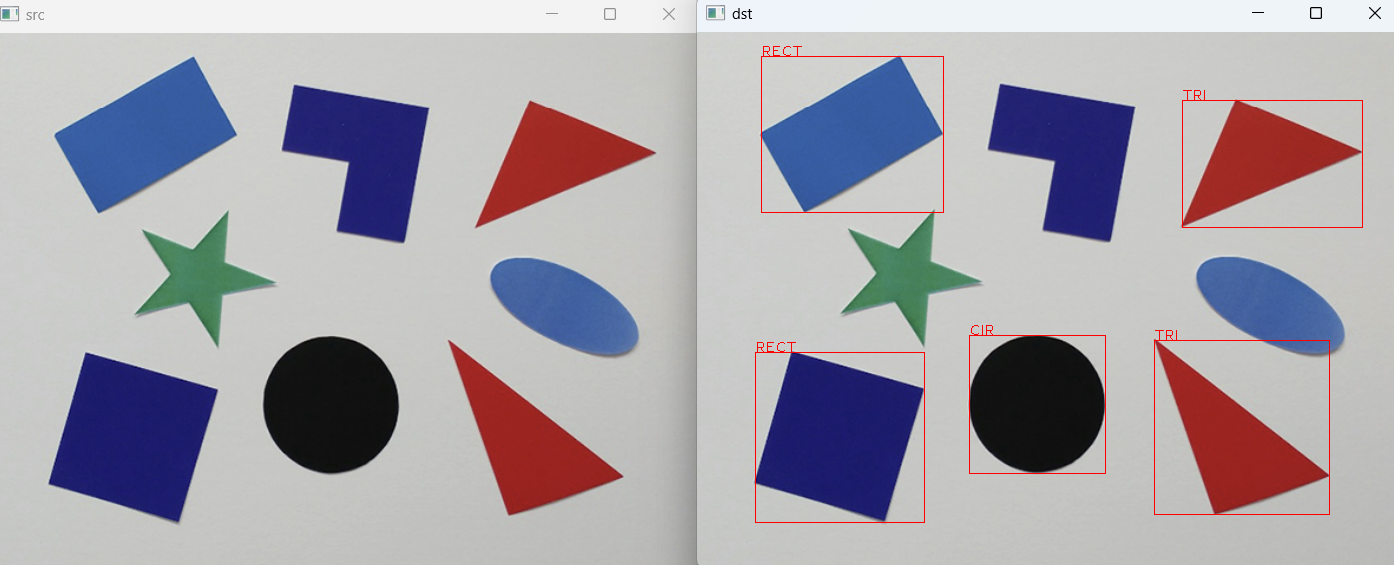